In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical, plot_model
import graphviz
from sklearn.metrics import accuracy_score

In [2]:
#keras has already included the MNIST dataset
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Data is in the form of pixel values not actual images

In [4]:
X_train.shape


(60000, 28, 28)

 Our training dataset(3 D array) consists of  data of 60,000 images each image is a numpy array of(28,28)

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

Our testing dataset(3 D array) consists of  data of 10,000 images each image is a numpy array of(28,28)

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

y_train consists of labels which shows the digit present in each image
Now in the next step we will convert pixel value to image using matplotlib

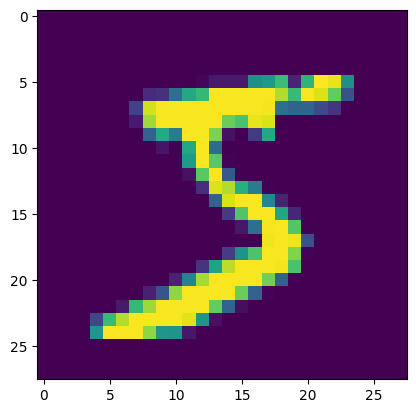

In [8]:
plt.imshow(X_train[0])

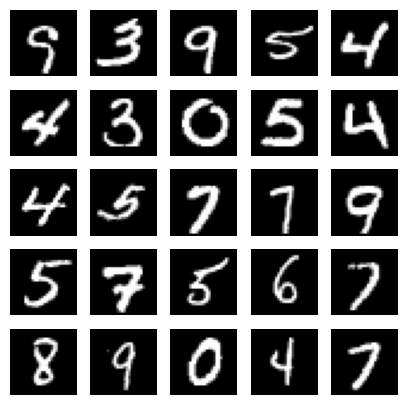

In [9]:
# Data Visualization:The following code will help to sample the 25 random MNIST digits and visualize them.
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Data Preprocessing: NORMALIZING THE DATA
If we see each image consists of pixel values from 0 to 255
Thus value should only be in the range of 0 t0 1 because pixel values should be in similar range so that weights are generated more quickly and conversions are fast

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Designing our model architecture
1.Now we wil add layers to our model using keras sequential model
We need to flatten the array to convert (28,28) 2D pixel value to 784 pixel value using flatten layer that converts higher dimensional array to 1 D array.
2.The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network.
The Sequential class of the Keras library is a wrapper for the sequential neural network model that Keras offers

In [13]:
dropout=0.45
model=Sequential()
model.add(Flatten(input_shape=(28,28)))#(1x784)specifying the input_shape as parameter
model.add(Dropout(dropout))
model.add(Dense(128,activation='relu'))#Output of flatten layer passed to dense which consists of 128 nodes
model.add(Dense(32,activation='relu'))
#Always remember when you have more than one node at the output layer we will use the activation function softmax for classification
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


From  model summary
Dropout layer randomly removes the fraction of units from participating in the next layer.
it can be noted that no parameters are passesd in the flatten layer ,thus no training is performed at the flatten layer.
Now,coming to the dense layer 100480 parameters were passed((784 inputs*128 nodes)+128 biases)
At the next dense layer 4128 parameters were passed((128 inputs*32 nodes)+32)
At the next layer we have  330 trainable parameters(32 nodes passed as inputs*10 nodes)+10 biases at the output layer

Total parameters denotes the total weights and biases in the model

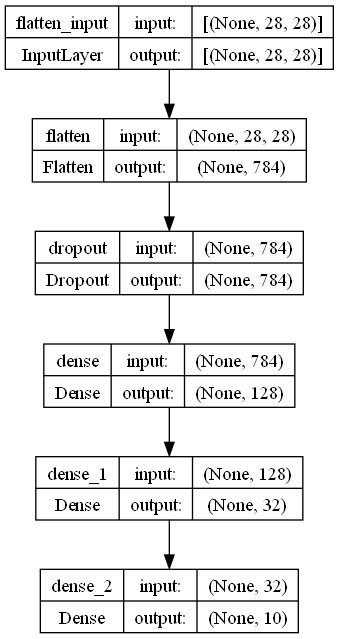

In [15]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)#plot_model is an API for model visualization

COMPILING THE MODEL
1.Now the point here to be noted is that in place of 'sparse_categorical_crossentropy' you can also use 'categorical_crossentropy'.
The only difference is that in the former, there is no need to one-hot- encode the labels while in the latter there is a need to one-hot- encode the labels.

In [16]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Loss function:How far the predicted tensor is from the one-hot ground truth vector is called loss.We are e ing se categorical_crossentropy as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

In [17]:
#Training the model
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 14s 5ms/step - loss: 0.4372 - accuracy: 0.8650 - val_loss: 0.1631 - val_accuracy: 0.9519
Epoch 2/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2244 - accuracy: 0.9305 - val_loss: 0.1240 - val_accuracy: 0.9628
Epoch 3/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1762 - accuracy: 0.9452 - val_loss: 0.1034 - val_accuracy: 0.9691
Epoch 4/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1534 - accuracy: 0.9514 - val_loss: 0.1011 - val_accuracy: 0.9689
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1383 - accuracy: 0.9561 - val_loss: 0.0988 - val_accuracy: 0.9697
Epoch 6/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1263 - accuracy: 0.9589 - val_loss: 0.0891 - val_accuracy: 0.9729
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1196 - accuracy: 0.9618 - val_loss: 0.0902 - val_accuracy

In [18]:
#will give the probability values for each image for 0 to 9,and so we will select the maximun probability from each array
y_prob=model.predict(X_test)

313/313 [==============================] - 2s 3ms/step


In [19]:
y_pred=y_prob.argmax(axis=1)

In [20]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc*100}%")

Accuracy is 97.85000000000001%


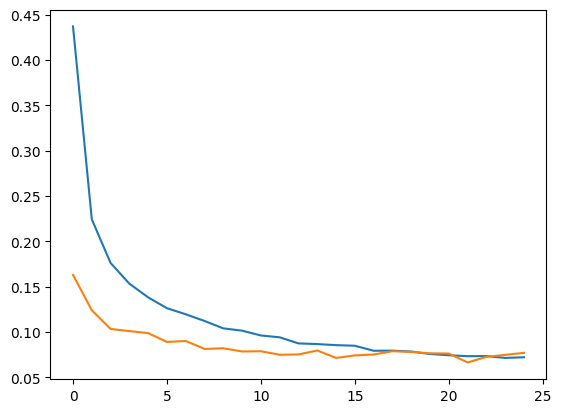

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

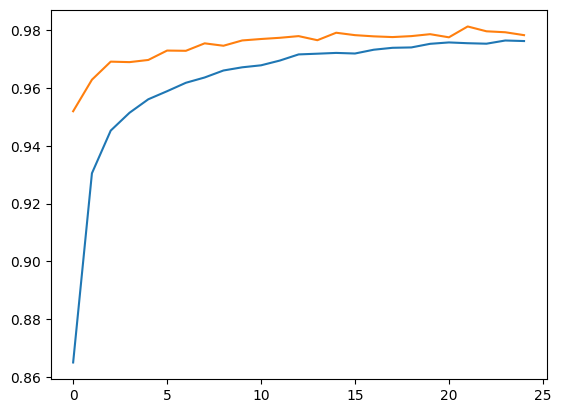

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

The above two graphs show that our model is a little bit overfitted(A neural network has the property to memorize the characteristics of training data. This is called overfitting).
This can be avoided by using techniques known as dropouts, and regularization to improve the performance of our neural network.

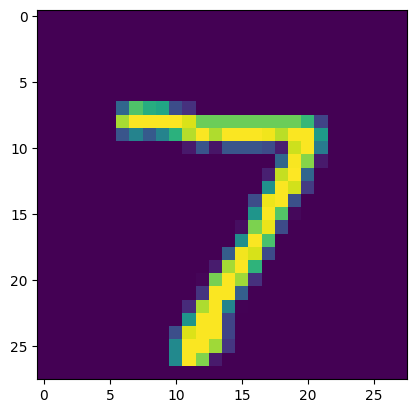

In [23]:
plt.imshow(X_test[0])

In [24]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 74ms/step


array([7], dtype=int64)

In [25]:
#Saving the model
model.save('model.h5')

C:\Users\Gyanvi\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
#evaluating the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9785


[0.07110246270895004, 0.9785000085830688]

In [27]:
#Saving the weights that is the knowledge
model.save_weights('MNIST.h5')

In [ ]:
accuracy_score()